## Import Dependencies & the Pretrained model

In [3]:
# tensfor hub, tensforlow, matplotlib, numpy & opencv
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt 
import numpy as np 
import cv2

In [4]:
# will use the pretrained arbitarty-image-stylization-v1-256 from tensorflow_hub

model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Preprocess the Image and Load the image

In [ ]:
# define function that will be used to load the image & pre-process them 
# 1.) load image using tensorflow, decoding it and making sure that it has 3 channels 
# 2.) Remformat it --> making sure it is a float 32 format 
# 3.) Addition of a new axis --> becasue the model expects to be inside of its own array 
# 4.) Return the image 


In [7]:
def load_IMAGE(img_path): #define function name(expecting image path)
    img = tf.io.read_file(img_path) #tensorflow io helpers to read in file 
    img = tf.image.decode_image(img,channels=3) #makes sure that the image has 3 channels 
    img = tf.image.convert_image_dtype(img, tf.float32) #convertign the imaeg data type or dtype 
    img = img[tf.newaxis, :] # #esnures image is inside a new array   { pass image, indexer that grabs the entire image }
    return img

In [37]:
content_image = load_IMAGE('profile.jpg')
style_image = load_IMAGE('klimt.jpg')

## Visualise the Loaded Image

In [38]:
# make sure the images were loaded sucessfully 
content_image.shape

TensorShape([1, 360, 360, 3])

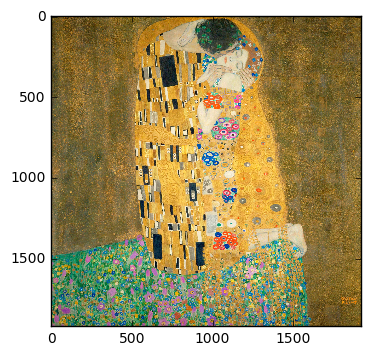

In [39]:
# make sure the images were loaded sucessfully 
plt.imshow(np.squeeze(style_image)) # np.squeeze to grab the image out of the array that was setup in load_Image()
plt.show()

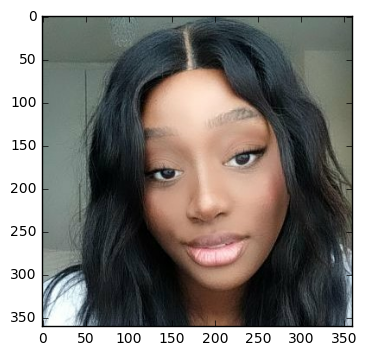

In [14]:
# make sure the images were loaded sucessfully 
plt.imshow(np.squeeze(content_image)) # np.squeeze to grab the image out of the array that was setup in load_Image()
plt.show()

## Preform Neural Style Tranfer [Stylise the Loaded Image]

In [40]:
# used the model(content image, and style iamge ) 
#) first convrt them to tf.constants 
# [0]: then stract the first result
stylised_image = model(tf.constant(content_image), tf.constant(style_image))[0]

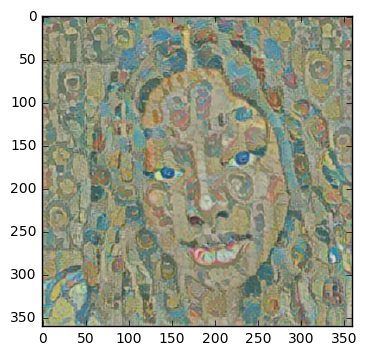

In [41]:
#visualise it 
plt.imshow(np.squeeze(stylised_image))
plt.show()

In [42]:
#export image 
#pass in name of image to output
# cv2.cvtColor: by default it is going to use bgr and want rgb instead --> use cv2.COLOR_BGR2RGB to convert the colour 
#then squeeze the image and multiply it by 255--> this multiplcation, reverses the normalisation that the neual style transfer outputs
#divides by 255 when it is time to output 
cv2.imwrite('generated_img_klimt.jpg', cv2.cvtColor(np.squeeze(stylised_image)*255, cv2.COLOR_BGR2RGB))

True